## 데이터 불러오기

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
def str_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) == 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col


def int_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) != 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col 

def p_100(a, b):
    print( round( (a/(a+b))*100,2), "%" )
    
def extraction_func(df, col_name, num_list):
    temp = pd.DataFrame()
    for i in num_list:
        temp = pd.concat([ temp, df.loc[df[col_name] == i ] ],axis=0)
    return temp    

In [13]:
scaled_insurance = pd.read_csv('./temp_data/save_scaled_insurance.csv',encoding='utf-8')
print(scaled_insurance.shape)
print(scaled_insurance.dtypes)
print(scaled_insurance.isnull().sum())
scaled_insurance.tail(5)

(20585, 79)
CUST_ID          int64
AGE            float64
CHLD_CNT       float64
CLAIM_NUM      float64
CUST_INCM      float64
                ...   
SEX_남            int64
SEX_여            int64
WEDD_YN_N        int64
WEDD_YN_Y        int64
SIU_CUST_YN     object
Length: 79, dtype: object
CUST_ID        0
AGE            0
CHLD_CNT       0
CLAIM_NUM      0
CUST_INCM      0
              ..
SEX_남          0
SEX_여          0
WEDD_YN_N      0
WEDD_YN_Y      0
SIU_CUST_YN    0
Length: 79, dtype: int64


,CUST_ID,AGE,CHLD_CNT,CLAIM_NUM,CUST_INCM,CUST_RGST,DISTANCE,HOUSE_HOSP_DIST,PAYM_AMT,RCBASE_HSHD_INCM,...,RESI_TYPE_CODE_40.0,RESI_TYPE_CODE_50.0,RESI_TYPE_CODE_60.0,RESI_TYPE_CODE_70.0,RESI_TYPE_CODE_99.0,SEX_남,SEX_여,WEDD_YN_N,WEDD_YN_Y,SIU_CUST_YN
20580,875,0.540230,0.333333,0.061856,0.401198,0.369030,0.004816,0.023391,0.002089,0.000000,...,0,0,0,0,0,1,0,0,1,Y
20581,21483,0.321839,0.000000,0.092784,0.000000,0.369030,0.025456,0.023111,0.001411,0.472086,...,0,0,0,0,0,0,1,1,0,N
20582,21940,0.241379,0.000000,0.041237,0.000000,0.322781,0.036923,0.012756,0.000485,0.581068,...,0,0,0,0,0,0,1,1,0,N
20583,20356,0.149425,0.000000,0.010309,0.000000,0.369030,0.038528,0.044157,0.001084,0.401432,...,0,0,0,0,0,1,0,1,0,N
20584,17118,0.183908,0.000000,0.010309,0.000000,0.369030,0.004013,0.001445,0.001299,0.390640,...,0,0,0,0,0,0,1,1,0,N


##### 데이터 복사

In [14]:
copy_insurance = scaled_insurance.copy()

## 훈련데이터와 검증데이터로 분리

In [15]:
from sklearn.model_selection import train_test_split

label = 'SIU_CUST_YN'

x_train, x_test, y_train, y_test = train_test_split(copy_insurance[copy_insurance.columns.drop(label)], copy_insurance[label],\
                                                              test_size=0.2, random_state=42)


train_0 = y_train.to_frame().loc[y_train.to_frame()['SIU_CUST_YN'] == 'N'].count()
train_1 = y_train.to_frame().loc[y_train.to_frame()['SIU_CUST_YN'] == 'Y'].count()
test_0 = y_test.to_frame().loc[y_test.to_frame()['SIU_CUST_YN'] == 'N'].count()
test_1 = y_test.to_frame().loc[y_test.to_frame()['SIU_CUST_YN'] == 'Y'].count()

x_train.to_csv('./temp_data/save_x_train.csv',index = True)
y_train.to_csv('./temp_data/save_y_train.csv',index = True)
x_test.to_csv('./temp_data/save_x_test.csv',index = True)
y_test.to_csv('./temp_data/save_y_test.csv',index = True)

print(train_0)
print(train_1)

print(test_0)
print(test_1)

SIU_CUST_YN    15028
dtype: int64
SIU_CUST_YN    1440
dtype: int64
SIU_CUST_YN    3751
dtype: int64
SIU_CUST_YN    366
dtype: int64


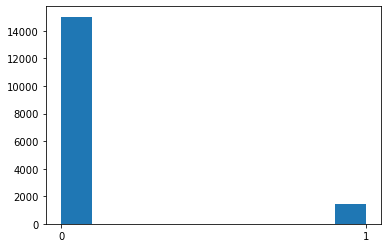

0    15028
1     1440
Name: SIU_CUST_YN, dtype: int64
8.74 %
None


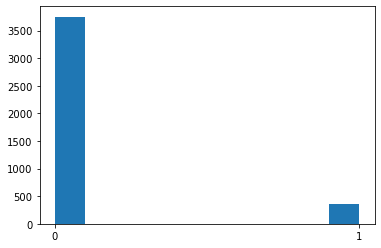

0    3751
1     366
Name: SIU_CUST_YN, dtype: int64
8.89 %
None


In [16]:
y_train = y_train.replace('Y',1)
y_train = y_train.replace('N',0)

y_test = y_test.replace('Y',1)
y_test = y_test.replace('N',0)

plt.hist(y_train)
plt.xticks([0,1])
plt.show()

print(y_train.value_counts())
print(p_100(y_train.value_counts()[1],y_train.value_counts()[0]))

plt.hist(y_test)
plt.xticks([0,1])
plt.show()

print(y_test.value_counts())
print(p_100(y_test.value_counts()[1],y_test.value_counts()[0]))

## 군집 전 의사결정에 영향이 매우 적은 변수들을 제외하기 위해 feature importance 확인
 - 현재 변수가 79개로 3,4차 군집을 해도 군집이 되자 않음

In [17]:
f_extraction = pd.concat([x_train, y_train], axis=1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(f_extraction[f_extraction.columns.drop('SIU_CUST_YN')], f_extraction['SIU_CUST_YN'], test_size=0.2, random_state=42)

In [18]:
# 원래 여기 데이터에는 검증 데이터를 넣어야함 Test 데이터 넣으면 안됨!
# 검증 데이터 넣어주어서 교차검증 해보도록하기


evals = [(x_test_2, y_test_2)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3, random_state=42)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper.fit(x_train_2, y_train_2, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')

preds = xgb_wrapper.predict(x_test_2)
preds_proba = xgb_wrapper.predict_proba(x_test_2)[:, 1]
print(preds_proba[:10])

[0]	validation_0-logloss:0.62302
[1]	validation_0-logloss:0.56624
[2]	validation_0-logloss:0.51865
[3]	validation_0-logloss:0.47896
[4]	validation_0-logloss:0.44513
[5]	validation_0-logloss:0.41613
[6]	validation_0-logloss:0.39133
[7]	validation_0-logloss:0.37011
[8]	validation_0-logloss:0.35190
[9]	validation_0-logloss:0.33572
[10]	validation_0-logloss:0.32155
[11]	validation_0-logloss:0.30949
[12]	validation_0-logloss:0.29864
[13]	validation_0-logloss:0.28931
[14]	validation_0-logloss:0.28113
[15]	validation_0-logloss:0.27375
[16]	validation_0-logloss:0.26738
[17]	validation_0-logloss:0.26180
[18]	validation_0-logloss:0.25688
[19]	validation_0-logloss:0.25291
[20]	validation_0-logloss:0.24916
[21]	validation_0-logloss:0.24568
[22]	validation_0-logloss:0.24291
[23]	validation_0-logloss:0.24034
[24]	validation_0-logloss:0.23830
[25]	validation_0-logloss:0.23606
[26]	validation_0-logloss:0.23410
[27]	validation_0-logloss:0.23219
[28]	validation_0-logloss:0.23083
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

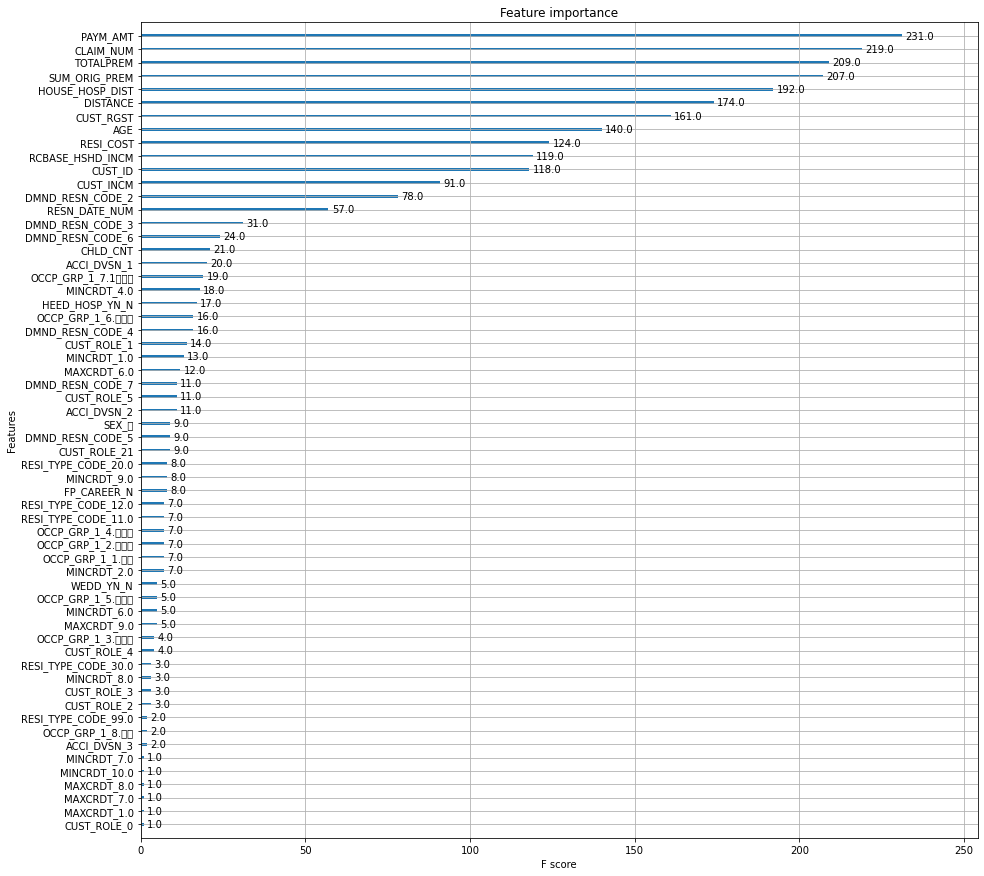

In [19]:
# feature별 중요도 시각화하기
fig, ax = plt.subplots(figsize=(15,15))
plot_importance(xgb_wrapper, ax)

##### 필요한 컬럼만 추출

In [25]:
x_train_FI = x_train[['DISTANCE','PAYM_AMT','CHLD_CNT','SUM_ORIG_PREM','TOTALPREM','HOUSE_HOSP_DIST','RCBASE_HSHD_INCM','AGE','CUST_RGST','CLAIM_NUM','CUST_INCM',\
            'DMND_RESN_CODE_1', 'DMND_RESN_CODE_2','DMND_RESN_CODE_3', 'DMND_RESN_CODE_4', 'DMND_RESN_CODE_5','DMND_RESN_CODE_6',\
            'DMND_RESN_CODE_7', 'DMND_RESN_CODE_9','ACCI_DVSN_1', 'ACCI_DVSN_2', 'ACCI_DVSN_3','SEX_남', 'SEX_여','CUST_ROLE_0',\
                      'CUST_ROLE_1', 'CUST_ROLE_2', 'CUST_ROLE_21', 'CUST_ROLE_3','CUST_ROLE_4', 'CUST_ROLE_5']]

In [26]:
x_train_FI.to_csv('./temp_data/save_feature_importance.csv',index = True)